#                                                                                   Time Series Analysis    

#### Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values. While regression analysis is often employed in such a way as to test relationships between one or more different time series, this type of analysis is not usually called "time series analysis", which refers in particular to relationships between different points in time within a single series. Interrupted time series analysis is used to detect changes in the evolution of a time series from before to after some intervention which may affect the underlying variable.

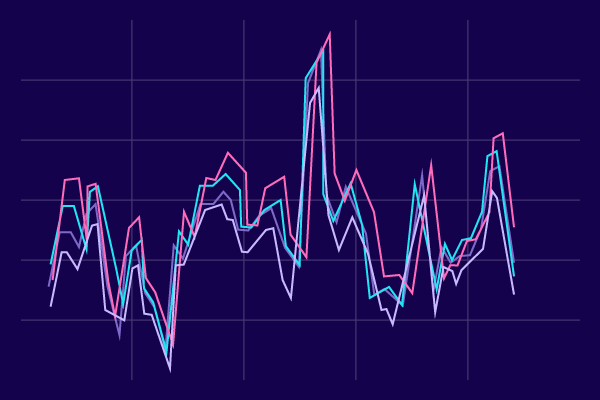

In [83]:
#Install the Standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [84]:
#Let load the dataset
data=pd.read_csv('AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,2.2475,2.2720,2.2105,2.2260,2.2260,208930000
1,2005-01-04,2.1335,2.1630,2.0750,2.1070,2.1070,388370000
2,2005-01-05,2.0785,2.1380,2.0780,2.0885,2.0885,167084000
3,2005-01-06,2.0905,2.1125,2.0450,2.0525,2.0525,174018000
4,2005-01-07,2.0690,2.1345,2.0580,2.1160,2.1160,196732000


In [3]:
data.shape

(4480, 7)

In [4]:
#data columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
#Remove the unwanted columns
data=data.drop(['Date','Adj Close'],axis=1)

In [6]:
data.head()

,Open,High,Low,Close,Volume
0,2.2475,2.2720,2.2105,2.2260,208930000
1,2.1335,2.1630,2.0750,2.1070,388370000
2,2.0785,2.1380,2.0780,2.0885,167084000
3,2.0905,2.1125,2.0450,2.0525,174018000
4,2.0690,2.1345,2.0580,2.1160,196732000


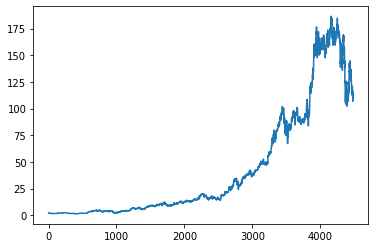

In [7]:
plt.plot(data.Close)

In [8]:
#To view the last 100 values mean 
max100=data.Close.rolling(100).mean()
max100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4475    121.634915
4476    121.684305
4477    121.677735
4478    121.774635
4479    121.870485
Name: Close, Length: 4480, dtype: float64

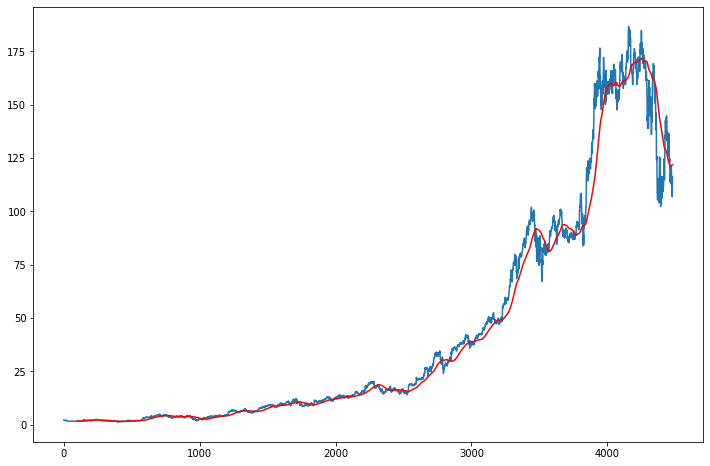

In [9]:
#Let's visualize the it
plt.figure(figsize=(12,8))
plt.plot(data.Close)
plt.plot(max100,'red')

In [10]:
max200=data.Close.rolling(200).mean()

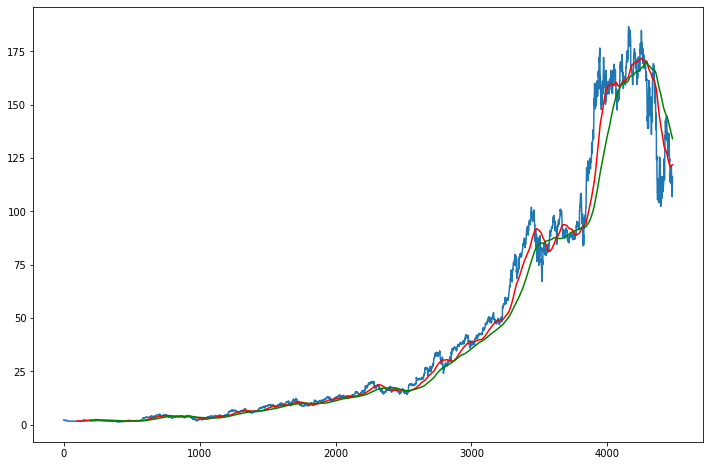

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data.Close)
plt.plot(max100,'red')
plt.plot(max200,'green')

In [12]:
data.shape

(4480, 5)

# Divided the data into training and testing

In [13]:
# We take the 70 training data 
# and 30% per testing data 
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

In [14]:
#check the shape
print(data_training.shape)
print(data_testing.shape)

(3136, 1)
(1344, 1)


In [15]:
#Scalling the values using the MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=scaler.fit_transform(data_training)

In [16]:
data_training_array

array([[0.01872583],
       [0.01631025],
       [0.01593472],
       ...,
       [0.96460871],
       [0.95212478],
       [0.97601675]])

In [17]:
x_train=[]
y_train=[]
#create for loop for feature prediction for next 100 days
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [18]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [19]:
x_train.shape

(3036, 100, 1)

# Model buliding using the LSTM

In [20]:
#import the kreas libreris
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

2022-10-19 20:18:27.267787: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 20:18:27.271831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 20:18:27.271847: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [40]:
model=Sequential()
#add first layer
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#add second layer
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.5))
#add thired layers
model.add(LSTM(units=100,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
#add fourth layer
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.8))
#add dence layer
model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_5 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 100)          72400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [42]:
#Compile the model with adam optimizer and loss function then finally compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
95/95 [==============================] - 15s 128ms/step - loss: 0.0220
Epoch 2/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0108
Epoch 3/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0094
Epoch 4/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0080
Epoch 5/20
95/95 [==============================] - 12s 123ms/step - loss: 0.0072
Epoch 6/20
95/95 [==============================] - 12s 125ms/step - loss: 0.0077
Epoch 7/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0070
Epoch 8/20
95/95 [==============================] - 12s 123ms/step - loss: 0.0062
Epoch 9/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0058
Epoch 10/20
95/95 [==============================] - 12s 125ms/step - loss: 0.0062
Epoch 11/20
95/95 [==============================] - 12s 124ms/step - loss: 0.0056
Epoch 12/20
95/95 [==============================] - 12s 125ms/step - loss: 0.0057
Epoch 13/20
9

In [43]:
model.save('LSTM_1.h5')

In [44]:
data_testing.head()

,Close
3136,49.758499
3137,49.629501
3138,50.111500
3139,50.064999
3140,50.187000


In [45]:
past_100_days=data_training.tail()
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

/tmp/ipykernel_19127/2619201730.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


,Close
0,48.245499
1,49.039501
2,48.823502
3,48.208500
4,49.385502


In [46]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00942061],
       [0.01510666],
       [0.01355983],
       ...,
       [0.42945996],
       [0.47880094],
       [0.49720535]])

In [47]:
input_data.shape

(1349, 1)

In [48]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [49]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1249, 100, 1)
(1249,)


In [50]:
y_predicted=model.predict(x_test)

40/40 [==============================] - 2s 35ms/step


In [51]:
y_predicted

array([[0.03578457],
       [0.03621086],
       [0.03677611],
       ...,
       [0.5205482 ],
       [0.51724565],
       [0.5138284 ]], dtype=float32)

In [52]:
print(y_predicted.shape)
print(y_test.shape)

(1249, 1)
(1249,)


In [53]:
y_test

array([0.05910891, 0.05572165, 0.0619448 , ..., 0.42945996, 0.47880094,
       0.49720535])

In [54]:
y_predicted

array([[0.03578457],
       [0.03621086],
       [0.03677611],
       ...,
       [0.5205482 ],
       [0.51724565],
       [0.5138284 ]], dtype=float32)

In [55]:
scaler.scale_

array([0.00716125])

In [56]:
scale_factor=1/0.00716125
y_prediction=y_predicted*scale_factor
y_test=y_test*scale_factor

In [57]:
y_prediction.shape

(1249, 1)

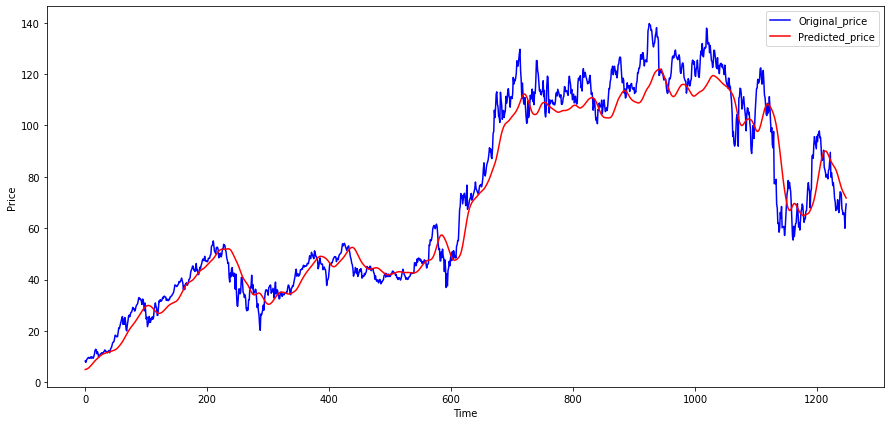

In [58]:
plt.figure(figsize=(15,7))
plt.plot(y_test,'blue',label="Original_price")
plt.plot(y_prediction,'red',label="Predicted_price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [59]:
import plotly.express as px

In [78]:
y_pred=y_prediction.reshape(-1,)
y_pred.shape

(1249,)

In [79]:
y_test.shape

(1249,)

In [85]:
date=data["Date"]

In [86]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=date, y=y_test, name="Test", mode="lines"))
fig.add_trace(go.Scatter(x=date, y=y_pred, name="Prediction", mode="lines"))
fig.update_layout(
    title="Amazon stock prices", xaxis_title="Date", yaxis_title="Close"
)
fig.show()